# Um olhar sobre a performance das salas de cinema no Brasil e suas preferências de consumo - Dados de 2009 a 2017"

## Análise Exploratória

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import catboost
import ydata_profiling as yp

from matplotlib.ticker import FuncFormatter

%matplotlib inline

---

## Limpeza e Preparação

In [2]:
df_salas_exib = pd.read_csv('SalasDeExibicaoEComplexos.csv')
df_salas_exib.head(5)
df_salas_exib_clean = df_salas_exib[['NOME_SALA', 'REGISTRO_SALA', 'SITUACAO_SALA',
       'ASSENTOS_SALA', 'NOME_COMPLEXO',
       'MUNICIPIO_COMPLEXO', 'UF_COMPLEXO',
       'COMPLEXO_ITINERANTE', 'OPERACAO_USUAL', 'EXIBIDOR',
       'SITUACAO_EXIBIDOR','GRUPO_EXIBIDOR']]

#-----------------------------------------------------------

df_bilheteria = pd.read_csv('BilheteriaObrasSemana.csv')
df_bilheteria = df_bilheteria[['TITULO_ORIGINAL', 'TITULO_BRASILEIRO', 'GENERO', 'PAIS_ORIGEM',
        'COPIAS', 'SALAS', 'DT_INICIO_EXIBICAO', 'DT_FIM_EXIBICAO',
       'PUBLICO', 'RENDA', 'ANO_CINEMATOGRAFICO']]


def to_datetime_year(df, coluna, date_format):
    df[coluna] = pd.to_datetime(df[coluna], format=date_format).dt.year

to_datetime_year(df_bilheteria, 'ANO_CINEMATOGRAFICO', '%Y-%m-%d')


def to_datetime(df, coluna, date_format):
    df[coluna] = pd.to_datetime(df[coluna], format=date_format)

to_datetime(df_bilheteria, 'DT_FIM_EXIBICAO', '%Y-%m-%d')
to_datetime(df_bilheteria, 'DT_INICIO_EXIBICAO', '%Y-%m-%d')


#-----------------------------------------------------------

df_ag_econ = pd.read_csv('AgentesEconomicosRegulares.csv')
df_ag_econ

def to_datetime(df, coluna, date_format):
    df[coluna] = pd.to_datetime(df[coluna], format=date_format)

to_datetime(df_ag_econ, 'DATA_REGISTRO', '%Y-%m-%d')


#------------------------------------------------------------



In [3]:
df_bilheteria[['PAIS_ORIGEM', 'COPRODUCAO_1', 'COPRODUCAO_2', 'COPRODUCAO_3', 'COPRODUCAO_4', 'COPRODUCAO_5']] = df_bilheteria['PAIS_ORIGEM'].str.split(', ', n=5, expand=True)

df_bilheteria


,TITULO_ORIGINAL,TITULO_BRASILEIRO,GENERO,PAIS_ORIGEM,COPIAS,SALAS,DT_INICIO_EXIBICAO,DT_FIM_EXIBICAO,PUBLICO,RENDA,ANO_CINEMATOGRAFICO,COPRODUCAO_1,COPRODUCAO_2,COPRODUCAO_3,COPRODUCAO_4,COPRODUCAO_5
0,COLLEGE,COLEGIAIS EM APUROS,Ficção,Estados Unidos,8,8,2009-01-02,2009-01-08,833,5325.00,2009,None,None,None,None,None
1,O ABORTO DOS OUTROS,O ABORTO DOS OUTROS,Documentário,Brasil,1,1,2009-01-02,2009-01-08,40,196.00,2009,None,None,None,None,None
2,ONDE ANDARÁ DULCE VEIGA?,ONDE ANDARÁ DULCE VEIGA?,Ficção,Brasil,1,1,2009-01-02,2009-01-08,66,210.00,2009,Chile,None,None,None,None
3,QUAND J'ETAIS CHANTEUR,QUANDO ESTOU AMANDO,Ficção,França,1,1,2009-01-02,2009-01-08,103,842.92,2009,None,None,None,None,None
4,REC,REC,Ficção,Espanha,2,2,2009-01-02,2009-01-08,252,1575.00,2009,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51171,BELLE DE JOUR,A BELA DA TARDE,Ficção,França,4,4,2017-12-28,2018-01-03,218,3058.00,2017,Itália,None,None,None,None
51172,BLOW-UP,BLOW-UP - DEPOIS DAQUELE BEIJO,Ficção,Estados Unidos,1,1,2017-12-28,2018-01-03,16,80.00,2017,Itália,Reino Unido,None,None,None
51173,COLO,COLO,Ficção,Portugal,2,2,2017-12-28,2018-01-03,60,464.00,2017,None,None,None,None,None
51174,"GRADUATE, THE",A PRIMEIRA NOITE DE UM HOMEM,Ficção,Estados Unidos,1,1,2017-12-28,2018-01-03,12,96.00,2017,None,None,None,None,None


In [10]:
df_bilheteria['PAIS_ORIGEM'].value_counts()

PAIS_ORIGEM
 Estados Unidos      17814
 Brasil              12702
 França               6624
 Alemanha             2676
 Argentina            1458
                     ...  
 Taiwan                  6
 Argélia                 3
 República Tcheca        2
 Albânia                 2
 Sérvia                  1
Name: count, Length: 68, dtype: int64

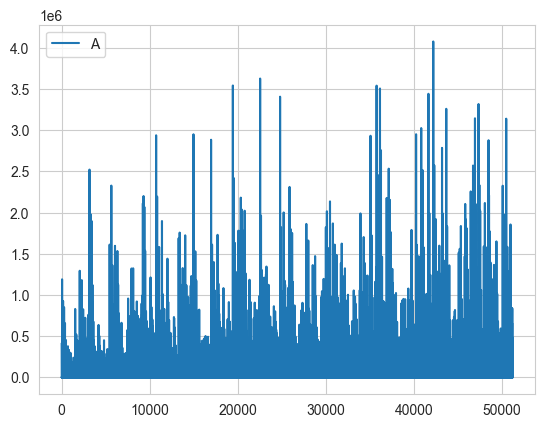

In [ ]:
plt.plot(df_bilheteria['PUBLICO'])
plt.legend('ABCDEF', ncol=2, loc='upper left');

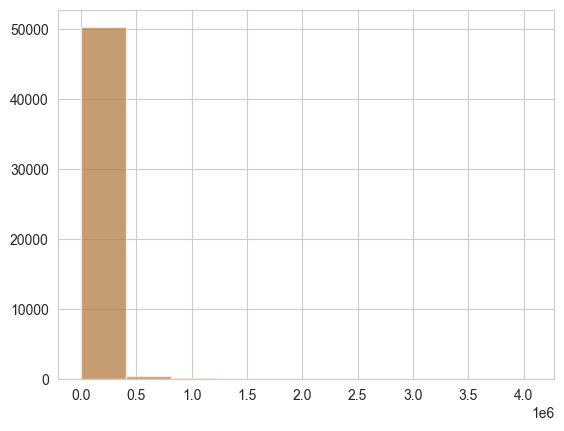

In [ ]:
for col in 'xy':
    plt.hist(df_bilheteria['PUBLICO'], alpha=0.5)


In [ ]:

#PLOT N° DE PRODUÇÔES BRAxEUA
sum_eua = (df_bilheteria_plot1['PAIS_ORIGEM'] == ' Estados Unidos').sum()
sum_bra = (df_bilheteria_plot1['PAIS_ORIGEM'] == ' Brasil').sum()

total_productions = sum_eua + sum_bra

#Calcular Porcentagem de produções
percentage_eua = (sum_eua / total_productions) * 100
percentage_bra = (sum_bra / total_productions) * 100

# Criar plot
countries = ['Estados Unidos', 'Brasil']
percentages = [sum_eua, sum_bra]
colors = ['blue', 'green']

plt.figure(figsize=(6, 6))
plt.pie(percentages, labels=countries, autopct=lambda p: '{:.0f}'.format(p * total_productions / 100), startangle=140)
plt.title('N° de Produções - BRASIL x EUA')
plt.axis()
plt.show()

#PLOT RENDA BRAxEUA
df_plot = df_bilheteria_plot1[['PAIS_ORIGEM', 'RENDA']]

# Agrupar e calcular a somatória da RENDA por país
grouped_data = df_plot.groupby('PAIS_ORIGEM').sum()

# Ordenar por RENDA
countries_renda = grouped_data.sort_values(by='RENDA', ascending=False).head(2)

# Criar Pie Plot
plt.figure(figsize=(6, 6))
plt.pie(countries_renda['RENDA'], labels=countries_renda.index, autopct='%1.1f%%', startangle=140)
plt.title('Renda BRASIL x EUA')
plt.axis()
plt.show()



NameError: name 'df_bilheteria_plot1' is not defined

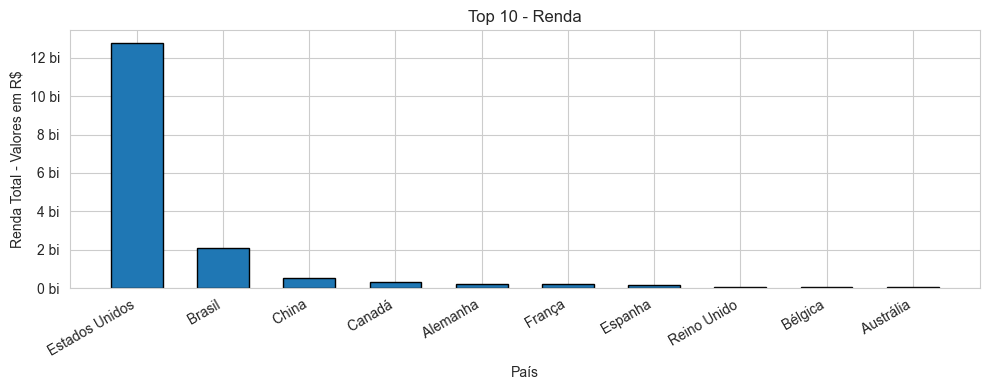

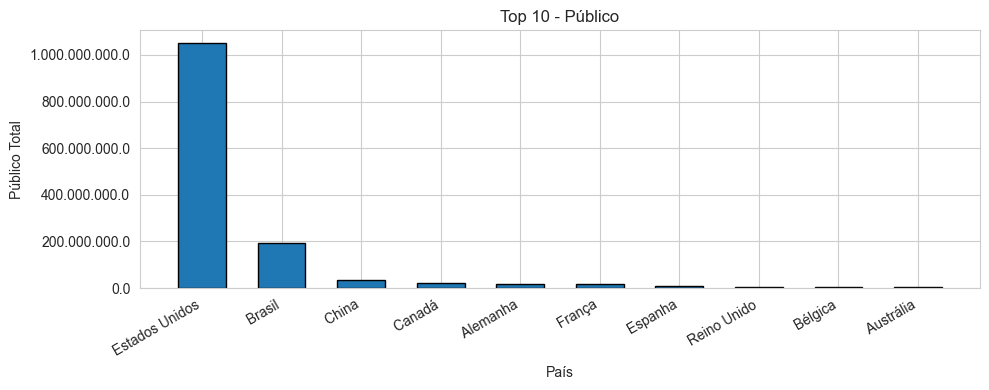

In [ ]:

df_plot = df_bilheteria_plot1[['PAIS_ORIGEM', 'SALAS', 'PUBLICO', 'RENDA']]

def group_and_plot(coluna):

    if coluna == 'RENDA':
        grouped_data = df_plot.groupby('PAIS_ORIGEM').sum()
        top_10 = grouped_data.sort_values(by=coluna, ascending=False).head(10)

        # Create the bar plot
        fig, ax = plt.subplots(figsize=(10, 4))
        ax.bar(top_10.index, top_10[coluna]/1000000000, width=0.6, edgecolor='black')
        ax.set_title(f'Top 10 - Renda')
        ax.set_xlabel('País')
        ax.set_ylabel('Renda Total - Valores em R$')

        def currency_formatter(x, pos):
            return "{:.0f} bi".format(x)

        ax.yaxis.set_major_formatter(FuncFormatter(currency_formatter))

    elif coluna == 'PUBLICO':
        grouped_data = df_plot.groupby('PAIS_ORIGEM').sum()
        top_10 = grouped_data.sort_values(by=coluna, ascending=False).head(10)

        # Create the bar plot
        fig, ax = plt.subplots(figsize=(10, 4))
        ax.bar(top_10.index, top_10[coluna], width=0.6, edgecolor='black')
        ax.set_title(f'Top 10 - Público')
        ax.set_xlabel('País')
        ax.set_ylabel('Público Total')

        def people_formatter(x, pos):
            return "{:,.1f}".format(x).replace(",", ".")

        ax.yaxis.set_major_formatter(FuncFormatter(people_formatter))

    plt.xticks(rotation=30, ha='right')
    plt.tight_layout()
    plt.show()

# Call the function for each statistic
group_and_plot('RENDA')  # Top 10 Países com maior RENDA
group_and_plot('PUBLICO')  # Top 10 Países com maior PUBLICO


<Axes: >

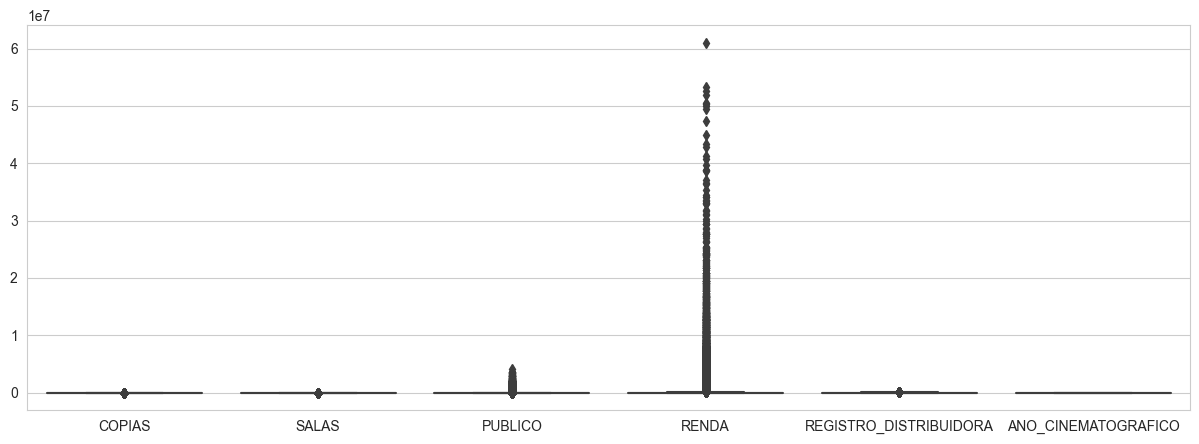

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(df_bilheteria)

In [9]:
import pandas as pd

df_coproducoes = df_bilheteria[['TITULO_ORIGINAL', 'PAIS_ORIGEM']]

soma_salas_pais = df_coproducoes['PAIS_ORIGEM'].str.split(',')
unique_countries = set(soma_salas_pais.explode().head(5))

for country in unique_countries:
    column_name = 'COPRODUCAO_' + country.strip()
    df_coproducoes[column_name] = df_coproducoes['PAIS_ORIGEM'].apply(lambda x: country in str(x))



df_coproducoes


C:\Users\syafo\AppData\Local\Temp\ipykernel_15884\2764503849.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coproducoes[column_name] = df_coproducoes['PAIS_ORIGEM'].apply(lambda x: country in str(x))
C:\Users\syafo\AppData\Local\Temp\ipykernel_15884\2764503849.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coproducoes[column_name] = df_coproducoes['PAIS_ORIGEM'].apply(lambda x: country in str(x))
C:\Users\syafo\AppData\Local\Temp\ipykernel_15884\2764503849.py:10: SettingWithCopyWarning: 
A

,TITULO_ORIGINAL,PAIS_ORIGEM,COPRODUCAO_Espanha,COPRODUCAO_França,COPRODUCAO_Brasil,COPRODUCAO_Estados Unidos
0,COLLEGE,Estados Unidos,False,False,False,True
1,O ABORTO DOS OUTROS,Brasil,False,False,True,False
2,ONDE ANDARÁ DULCE VEIGA?,Brasil,False,False,True,False
3,QUAND J'ETAIS CHANTEUR,França,False,True,False,False
4,REC,Espanha,True,False,False,False
...,...,...,...,...,...,...
51171,BELLE DE JOUR,França,False,True,False,False
51172,BLOW-UP,Estados Unidos,False,False,False,True
51173,COLO,Portugal,False,False,False,False
51174,"GRADUATE, THE",Estados Unidos,False,False,False,True


---